In [1]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import qutip as quit
from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve)
from qutip.measurement import measure_observable, measurement_statistics
from qutip.expect import expect
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
#Add util to the path
import sys
sys.path.append('../util')
sys.path.append('../')

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
#import savgol:
from scipy.signal import savgol_filter
from fitting_functions_ZNE import third_no_first_ZNE, converge_ZNE_order, converge_ZNE_loocv, order_poly_ZNE

from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve, sesolve, mesolve)
from basic_TFIM_funcs import get_s_lists
from joblib import Parallel, delayed
from samplers_util import thermal_rejection
from functions_util import calibrate_sim_Omegas, zero_temperature_Omega


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# Data generated by Jij_Extrapolation.ipynb
file = np.load('plotting_data_fig_4_12-3.npz')
file = np.load('plotting_data_fig_4.npz')
file = np.load('plotting_data_fig_4_12-13_good.npz')


#np.savez('Plotting data', times = times, leakage_matrix = leakage_matrix, flopping_matrix = flopping_matrix, flopping_std_matrix = flopping_std_matrix, flopping_matrix_ps = flopping_matrix_ps, flopping_matrix_smooth = flopping_matrix_smooth, flopping_std_matrix_smooth = flopping_std_matrix_smooth, ZNE_data = ZNE_data, ZNE_data_smooth = ZNE_data_smooth, Omega = Omega, decoherence_limit = decoherence_limit)

times = file['times']
theta_list = file['theta_list']
print(theta_list)
flopping_ps_smoothed = file['flopping_ps_smoothed']
flopping_std_matrix = file['flopping_std_matrix']
shots = file['shots']
Omega = file['Omega']
flopping_matrix_smooth = file['flopping_matrix_smooth']
flopping_matrix = file['flopping_matrix']
leakage_matrix = file['leakage_matrix']
#import all data:

theta_sub_index = [0, 1, 2, 3, 4, 5]#, 6, 7, 8]
theta_sub_index = [0,3,4,5]
theta_sub_index_mask = [i in theta_sub_index for i in range(len(theta_list))]
print(theta_list[theta_sub_index_mask])
weights_comp = np.array([1, 1, 1, 1, 1.5, 2,4])
weights_comp = np.ones(len(theta_sub_index))
#Make font size 16

ZNE_function = converge_ZNE_loocv
ZNE_function = lambda x, y, weights: converge_ZNE_loocv(x, y, debug=False, y_error=weights, return_cov=True)

#Get ZNed Data:
ZNE_data_ps = np.zeros(len(times))
ZNE_data_raw = np.zeros(len(times))
ZNE_data_ps_errors = np.zeros(len(times))
ZNE_data_raw_errors = np.zeros(len(times))
ZNE_funcs = []
ZNE_funcs_ps = []
for i in range(30):
    #fit_func = third_no_first_ZNE(theta_list[theta_sub_index_mask], flopping_matrix[i,theta_sub_index_mask])
    fit_func, error = ZNE_function(theta_list[theta_sub_index_mask], flopping_ps_smoothed[i,theta_sub_index_mask], weights=flopping_std_matrix[i,theta_sub_index_mask]/np.sqrt(shots)*weights_comp)
    ZNE_funcs_ps.append(fit_func)
    ZNE_data_ps[i] = fit_func(0)
    ZNE_data_ps_errors[i] = error
    fit_func, error = ZNE_function(theta_list[theta_sub_index_mask], flopping_matrix_smooth[i,theta_sub_index_mask], weights=flopping_std_matrix[i,theta_sub_index_mask]/np.sqrt(shots)*weights_comp)
    ZNE_funcs.append(fit_func)
    ZNE_data_raw[i] = fit_func(0)
    ZNE_data_raw_errors[i] = error

ZNE_data_smooth_ps = savgol_filter(ZNE_data_ps, 6, 2)
ZNE_data_smooth = savgol_filter(ZNE_data_raw, 6, 2)

dense_theta = np.linspace(0, theta_list[theta_sub_index[-1]]+0.02, 25)


[0.0583     0.06458467 0.07720552 0.09611104 0.10873188 0.12114668
 0.15308516]
[0.0583     0.09611104 0.10873188 0.12114668]
[nan, 0.0002164320164207387, 0.00012098338312792735]
2
[1 0]
[[ 1.85994042e-05 -1.68761245e-03]
 [-1.68761245e-03  1.80583071e-01]]
9.61429274795271e-06
0.004312702660677569
[nan, 0.0018618965731205586, 0.003086518433300841]
1
[1]
[[3.408966e-05]]
5.1126394348133315e-05
0.0058386351169567
[nan, 0.008792759183189308, 0.003325883231088661]
2
[1 0]
[[ 6.25885086e-04 -5.31657879e-02]
 [-5.31657879e-02  5.20862803e+00]]
0.0005438794924140656
0.025017695448897277
[nan, 0.003672884857569951, 0.005154202781459477]
1
[1]
[[6.61636691e-05]]
8.643976688961979e-05
0.008134105302916018
[nan, 0.18539732868851216, 0.0032987848986234646]
2
[1 0]
[[ 3.77427088e-04 -3.17647955e-02]
 [-3.17647955e-02  3.09804549e+00]]
0.0019232266331186685
0.019427482802910734
[nan, 0.13604088674962625, 0.0011870136420489602]
2
[1 0]
[[ 2.12120735e-04 -1.78523802e-02]
 [-1.78523802e-02  1.74115670

[0.        0.1346125 0.269225  0.4038375 0.53845   0.6730625 0.807675
 0.9422875 1.0769    1.2115125 1.346125  1.4807375 1.61535   1.7499625
 1.884575  2.0191875 2.1538    2.2884125 2.423025  2.5576375 2.69225
 2.8268625 2.961475  3.0960875 3.2307    3.3653125 3.499925  3.6345375
 3.76915   3.9037625 4.038375 ]
0.1435097125
[0.03072856 0.07010728]
[ 0.61601497 -0.04698572 -0.54706052]


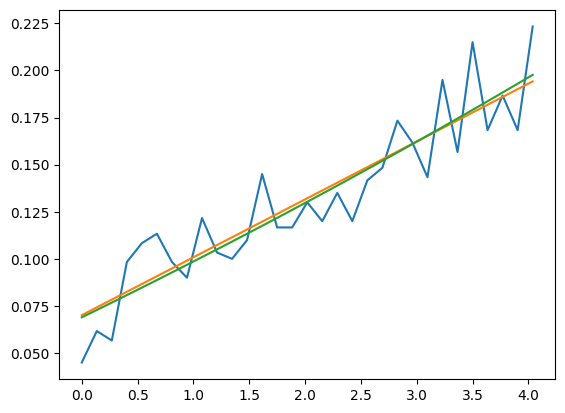

In [3]:
#Generate dense theta simulation data:  from detune scanning




#Simulating the Jij XX oscillations with active heating + maybe dephasing noise
"""How to deal with active heating of the chain?
Option 1: increase the random theta linearly in time. Probably the best bet. 
Option 2: rescample ever few time steps with a higher temperature.

I think option 1 is the best for now
"""
#Need to set Jij ~1000*2*pi, so Omega = np.sqrt(1000). This way the time scale is ms for a full Jij oscillation
#Realistic:
#theta_0  = 0.060577043438396795
#theta_dot = 0.0502438865537055 * 1e3
#print(theta_0)
#print(theta_dot)
#Not realistic:
theta_0  = 0.0583
#theta_0 = 0
theta_dot = 0.0211# * 1e3

print(times)
theta_f = theta_0 + theta_dot*max(times)#/1e3
print(theta_f)

#theta_0 = 0
#theta_dot = 0
sx, sy, sz = get_s_lists(2)

#t_list = np.linspace(0, max(times), 200)# * 1e-3
t_list = times
psi0 = tensor(basis(2,0), basis(2,1))


def J_func(J,i,j):
    return J*np.exp(-1*abs(i-j)+1)

def genH(theta_0, J, B):
    delta = thermal_rejection(theta_0,1)[0]
    factor = (1 - delta)**2
    #HXX = sx[0]*0
    #for i in range(2):
    #    for j in range(i+1,2):
    #        HXX += J_func(J,i,j)*factor*(sx[i]*sx[j])
    HXX = J*sx[0]*sx[1]*factor
    
    #HXX = sum([ sum( [J(i,j)*factor*(sx[i]*sx[j]) of i in range(j+1,4)] for j in range(4)]))

    #HXX = J*factor*(sx[0]*sx[1]) 
    #print(HXX)
    HB = B*(sz[0] + sz[1])# + sz[2] + sz[3])
    #print(HB)

    return [HXX + HB]

def genHt(theta_0, theta_dot, J, B):
    delta = thermal_rejection(theta_0,1)[0]
    def delta_func(t, args):
        updated_delta = delta + theta_dot*t#*10
        #print(t, updated_delta)
        return (1- updated_delta)**2

    HXX = J*sx[0]*sx[1]#*factor

    HB = B*(sz[0] + sz[1])# + sz[2] + sz[3])
    return [HB, [HXX,delta_func]]
    


#psi0 = tensor(basis(2,0), basis(2,0))
#yplus = (basis(2,0) + 1j*basis(2,1)).unit()
#minus = 
#psi0 = tensor(yplus, yplus)

#import Options from qutip:
from qutip.solver import Options
#increase nsteps
options = Options(nsteps=1e3)

def run(J,B, obs = None, noise={}, time = t_list):
    xrate = 0
    zrate = 0
    theta_0 = 0
    try:
        xrate = noise['x']
    except:
        pass
    try:
        zrate = noise['z']
    except:
        pass
    try:
        theta_0 = noise['theta']
    except:
        pass
    #print(xrate)
    #print(zrate)
    #print(theta_0)
    #H = genH(theta_0,J,B)
    Ht = genHt(theta_0, theta_dot, J, B)
    noisy_ops = [sx[i]*xrate for i in range(2)]
    noisy_ops = [sx[0]*xrate]
    #Sz_noise = (sz[0] * sz[1])*zrate#*sx[2]*sz[3])*zrate
    Sz_noise = [sz[i]*zrate for i in range(2)]
    #noisy_ops = []
    noisy_ops.append(Sz_noise)
    
    #results = mesolve(H, psi0,time, noisy_ops, obs, options=options)#, ntraj=1)
    results = mesolve(Ht, psi0,time, noisy_ops, obs, options=options)#, ntraj=1)
    return results
sim_shots = 600
#


#full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, theta_dot,Omega) for i in range(shots))
    

def gen_full_results(J,B, obs=None, noise={}, time=t_list):
    #H = genH(theta_0, theta_dot)
    #run(theta_0, J,B)
    #print(noise)
    #full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, J,B,obs = obs, noise=noise, time=time) for _ in range(shots))
    full_results = np.array([run(J,B,obs = obs, noise=noise, time=time) for _ in range(sim_shots)])
    
    averaged = np.zeros(len(time))
    for item in full_results:
        #print(item.expect[0])
        averaged += sum(item.expect)
    averaged = averaged/sim_shots
    return averaged + np.random.normal(0, 1/np.sqrt(sim_shots), len(time))
#fit leakage matrix to a line:
def linear(x, m, c):
    return m*x + c
popt, pcov = curve_fit(linear, times[1:], leakage_matrix[1:,0])
print(popt)
intercept = 1-popt[1]
slope = popt[0]
plt.plot(times, leakage_matrix[:,0])
plt.plot(times, linear(times, *popt))

def exp_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

#popt, pcov = curve_fit(exp_fit, times[1:], leakage_matrix[1:,0], p0=[1, .05, -1])
popt, pcov = curve_fit(exp_fit, times, leakage_matrix[:,0], p0=[1, -.04, -0.95])

print(popt)
#plt.plot(times, leakage_matrix[:,0])
plt.plot(times, exp_fit(times, *popt))


In [ ]:
dense_theta = np.linspace(0, 0.25,10)

J = Omega[0]/2/0.85

#1.05*np.pi#*0.95/2
B = 0#0.4*J
leakage_obs = [sz[0]*sz[1]]#
oscillation_obs = [sz[0]/2, -1*sz[1]/2]
#print(np.sqrt(0.0015)*J)
noise_dict = {'x':np.abs(popt[1]*4)/np.sqrt(2), 'z':0, 'theta':theta_0}

results_Jij_oscillation = gen_full_results(J, B, obs=oscillation_obs, noise=noise_dict)#, noise={'x':xrate, 'z':zrate, 'theta':theta_0})
results_Jij_leakage = gen_full_results( J, B, obs=leakage_obs, noise=noise_dict)#, noise={'x':xrate, 'z':zrate, 'theta':theta_0})
#Check if dense_theta_oscillations is defined. If not, define it
plt.plot(times, results_Jij_oscillation)
plt.plot(times, flopping_matrix[:,0])
plt.show()
zero_temp_Omega_value = zero_temperature_Omega(theta_0, np.sqrt(J), times)
effective_frequency_shift = np.sqrt(J)/zero_temp_Omega_value

Omega_comps = calibrate_sim_Omegas(dense_theta, np.sqrt(J), times, debug=False)*np.sqrt(J)/effective_frequency_shift

print(Omega_comps)
J_calibrated = J#Omega_comps**2

#try:
#    dense_theta_oscillations
#except:
dense_theta_oscillations = []
for theta_index in range(len(dense_theta)):
    theta = dense_theta[theta_index]
    J_calibrated = Omega_comps[theta_index]**2
    
#for theta_point in dense_theta:
    noise_dict['theta'] = theta#{'x':np.sqrt(slope), 'z':0, 'theta':theta_point}
    dense_theta_oscillations.append(gen_full_results(J_calibrated, B, obs=oscillation_obs, noise=noise_dict))




In [5]:
print(Omega_comps**2)
print(J)

[2.8296774  2.99274511 3.16416389 3.3377701  3.50735048 3.66910737
 3.82285236 3.9708807  4.11608008 4.26083448]
2.5168972636685085


In [6]:
#Plotting the ZNE Data slice:
#Add a vertial slice at the 3rd peak:
index = 12
dense_theta_oscillations_array = np.array(dense_theta_oscillations)

dense_flopping = ZNE_funcs_ps[index](dense_theta)
dense_ZNE_no_ps = ZNE_funcs[index](dense_theta)


In [7]:
errors_basic = np.abs((np.cos(Omega[0]*times) - flopping_matrix[:,0])/np.cos(Omega[0]*times))
errors_ZNE = np.abs((np.cos(Omega[0]*times) - ZNE_data_smooth)/np.cos(Omega[0]*times))
errors_PS_ZNE = np.abs((np.cos(Omega[0]*times) - ZNE_data_smooth_ps)/np.cos(Omega[0]*times))
errors_PS_only = np.abs((np.cos(Omega[0]*times) - flopping_ps_smoothed[:,0])/np.cos(Omega[0]*times))
#Smooth all the errors by convolving with a gaussian:
window = 10



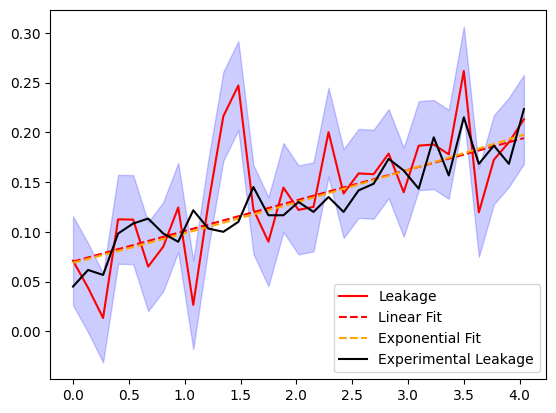

In [8]:
#plot the leakage of the simulation and the experimental data
plt.plot(times, 1+results_Jij_leakage*intercept, label = 'Leakage', color = 'r')
#Generate a bist fit line of the leakage matrix, not including the t=0 point:
#cureve fit:
#popt, pcov = curve_fit(linear, times[1:], leakage_matrix[1:,0])
#print(popt)
plt.plot(times, linear(times, slope, -1*intercept+1), color = 'r', linestyle = '--', label="Linear Fit")

plt.plot(times, exp_fit(times, *popt), color = 'orange', linestyle = '--', label="Exponential Fit")

plt.fill_between(times, 1+results_Jij_leakage*intercept-1/np.sqrt(500), 1+results_Jij_leakage*intercept+1/np.sqrt(500), color = 'blue', alpha = 0.2)
plt.plot(times, leakage_matrix[:,0], label = 'Experimental Leakage', color = 'k')
plt.legend()

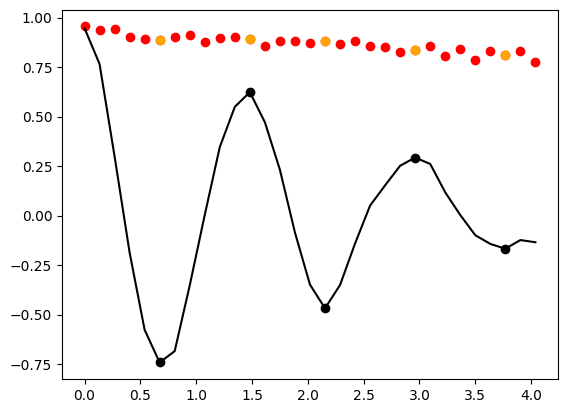

In [9]:
#Get the peak indices:
peak_indices = np.where(np.diff(np.sign(np.diff(np.abs(flopping_matrix_smooth[:,0])))) == -2)[0]+1

plt.plot(times[peak_indices], flopping_matrix_smooth[peak_indices,0], 'o', color = 'k')
plt.plot(times, flopping_matrix_smooth[:,0], label = 'Experimental Flopping', color = 'k')
plt.scatter(times, 1-leakage_matrix[:,0], label = '1-Leakage', color = 'r')
plt.scatter(times[peak_indices], 1-leakage_matrix[peak_indices,0], label = '1-Leakage', color = 'orange')


[4.27872535 4.60143097 3.54986353 4.20316246 3.63470958 3.6169111
 3.42691292]
5.033794527337017
0.9298927205795707


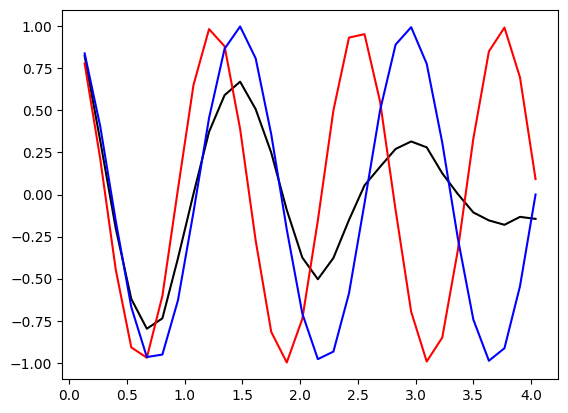

In [10]:
plt.plot(times[1:], flopping_matrix_smooth[1:,0]/intercept, label = 'Experimental Flopping', color = 'k')
plt.plot(times[1:], np.cos(J*2*times[1:]), label = 'Ideal', color = 'r')
print(Omega)
J_Omega = Omega[0]
print(J*2)
print(intercept)
plt.plot(times[1:], np.cos(J_Omega*times[1:]), label = 'Ideal', color = 'b')


2


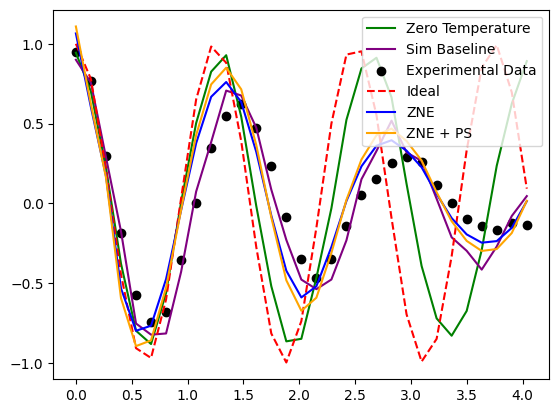

In [11]:

#Plot the oscillations:
#print(results_Jij_oscillation.shape)
#print(intercept)
#print(dense_theta_oscillations_array[0])

## Plots the zero temperature limit of the simulation data, which includes SPAM and depolarizing noise
plt.plot(times, dense_theta_oscillations_array[0]*intercept, label = 'Zero Temperature', color = 'g')
#print(dense_theta)
baseline_index = np.argmin(np.abs(dense_theta - theta_0))
print(baseline_index)
baseline_index = 2


#Plots the baseline experimental emulation data. This has a frequency correction applied to match the experimental data
plt.plot(times, dense_theta_oscillations_array[baseline_index]*intercept, label = 'Sim Baseline', color = 'purple')

#Plots the experimental data (smoothed)
plt.scatter(times, flopping_matrix_smooth[:,0], label = 'Experimental Data', color = 'k')
#plt.scatter(times, flopping_matrix_smooth[:,-1], label = 'Experimental Data High temp', color = 'k')

#Plots the Ideal oscillations
plt.plot(times, np.cos(J*2*times), label = 'Ideal', color = 'r', linestyle = '--')

#Plotting the ZNE results, for PS and without PS. The PS has to be before the ZNE. Also smoothing the ZNE results
plt.plot(times, ZNE_data_smooth, label = 'ZNE', color = 'b')
plt.plot(times, ZNE_data_smooth_ps, label = 'ZNE + PS', color = 'orange')



plt.legend()

[0.0583     0.06458467 0.07720552 0.09611104 0.10873188 0.12114668
 0.15308516]
[2, 3, 4, 4]


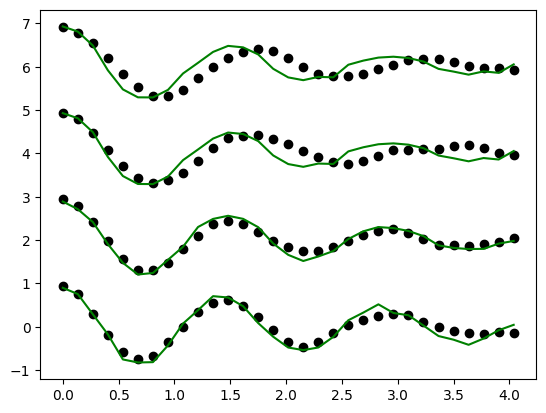

In [12]:
"""In a single plot, plot each of the sub_indexed data points corresponding to the temperatures, offset vertically. For each value of theta, find the matching index in the dense_thetas list, and plot the matching simulation over top. 

"""
print(theta_list)
matching_theta_indices = [np.argmin(np.abs(dense_theta - theta_list[i])) for i in theta_sub_index]
print(matching_theta_indices)
for i in range(len(theta_sub_index)):
    offset = 2*i
    plt.plot(times, dense_theta_oscillations_array[matching_theta_indices[i]]*intercept+offset, label = 'Sim Data', color = 'g')
    plt.scatter(times, flopping_matrix_smooth[:,theta_sub_index[i]] + offset, label = 'Exp Data', color = 'k')
    

[2, 3, 4, 4]


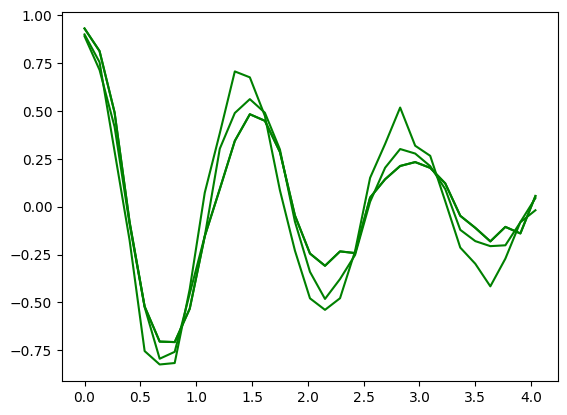

In [13]:
"""In a single plot, plot each of the sub_indexed data points corresponding to the temperatures, offset vertically. For each value of theta, find the matching index in the dense_thetas list, and plot the matching simulation over top. 

"""

matching_theta_indices = [np.argmin(np.abs(dense_theta - theta_list[i])) for i in theta_sub_index]
print(matching_theta_indices)
for i in range(len(theta_sub_index)):
    offset = 0
    plt.plot(times, dense_theta_oscillations_array[matching_theta_indices[i]]*intercept , label = 'Sim Data', color = 'g')
    #plt.plot(times, flopping_matrix_smooth[:,theta_sub_index[i]] + offset, label = 'Exp Data', color = 'k')
    

0.1111111111111111


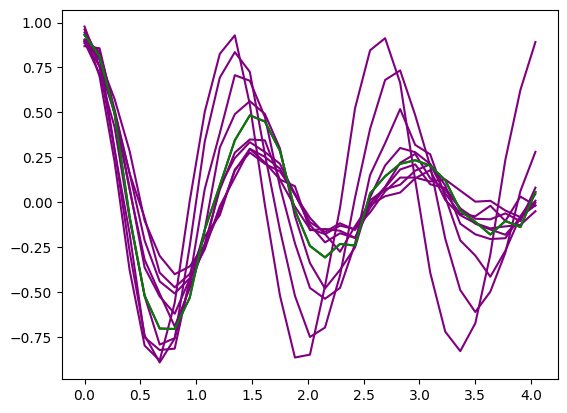

In [14]:
for theta_index in range(len(dense_theta)):
    plt.plot(times, dense_theta_oscillations_array[theta_index]*intercept, color = 'purple')
print(dense_theta[4])
plt.plot(times, dense_theta_oscillations_array[4]*intercept, label = 'Zero Temperature', color = 'g')

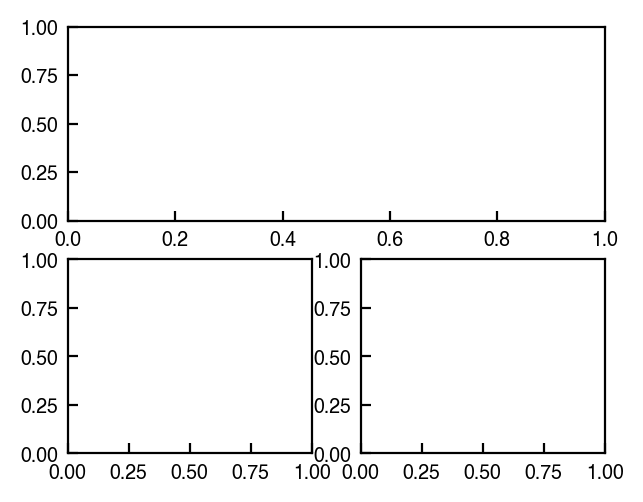

In [15]:
#import matplotlib as mpl
import matplotlib as mpl

columns = 1
rows = 2
#scol=(3+3/8) #single column width of PRL,
#dcol=2*scol # double column,
#size_col = [scol, dcol][columns-1]
#size_row = [scol, dcol][rows-1]
mmtoinch = 1/25.4
scol = 88 * mmtoinch
dcol = 180 * mmtoinch
size_col = [scol, dcol][columns-1]
if columns == 1:
    size_row = scol*rows
else:
    size_row = dcol*rows

fullwidth=6.3,
from matplotlib import cm
gr=(np.sqrt(5.0) - 1.0) / 2.0 #golden ratio,
cm_subsection = np.linspace(0.2, 1.0, 5)
Reds = [ cm.Reds(x) for x in cm_subsection ]
mpl.rcParams.update({
    "ytick.direction": "in",
    "xtick.direction": "in",
    "axes.labelpad": 0,
    "font.size": 7,
    "legend.frameon": True,
    "figure.dpi":200,
    "figure.figsize": [size_col, size_row * gr],
    "font.family": "Helvetica",
    #"axes.prop_cycle": cycler('color', palettable.colorbrewer.qualitative.Dark2_8.mpl_colors)
    # "axes.prop_cycle": cycler('color', palettable.colorbrewer.sequential.Reds_9.mpl_colors[1:])
})
fig = plt.figure()
gs = gridspec.GridSpec(3,2)  # 2x2 grid
ax_a = fig.add_subplot(gs[:2])
ax_bi = fig.add_subplot(gs[2])
ax_bii = fig.add_subplot(gs[3])



In [16]:

def create_linear_function(y_at_0_5):
    # Given points
    x1, y1 = 0.5, y_at_0_5
    x2, y2 = 1, 1
    
    # Calculate slope (a) and intercept (b)
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1
    
    # Return the linear function
    def linear_function(x):
        return a * x + b
    
    return linear_function

linear_func = create_linear_function(0.5)
#actual_x 
actual_x = theta_list[theta_sub_index_mask]
normalized_ZNE_points_for_color = linear_func(actual_x/max(actual_x))
#cm_subsection = np.linspace(0.2, 1.0, len(ZNE_points) )
Reds = [ cm.Reds(x) for x in normalized_ZNE_points_for_color ]
cmap = LinearSegmentedColormap.from_list('name', Reds)

colors = Reds#cmap(np.linspace(0, 1, len(ZNE_points)))

colorbar = plt.cm.ScalarMappable(cmap=cmap)
print(theta_list[theta_sub_index_mask])
labels = np.array([0.05, 0.1])
#labels = theta_list[theta_sub_index_mask]

scaled_ticks = linear_func(labels/max(actual_x))
cbar = plt.colorbar(colorbar, ax=ax_a, ticks=scaled_ticks)#, ticks=test_ticks)#normalized_ZNE_points_for_color[1:])
cbar.set_ticklabels(labels)


[0.0583     0.09611104 0.10873188 0.12114668]


<Figure size 692.913x856.488 with 0 Axes>

In [17]:

to_use = flopping_matrix_smooth
to_use = flopping_ps_smoothed
to_use = flopping_matrix
#print(flopping_std_matrix[:,index]/np.sqrt(500))
for index in range(len(theta_list[theta_sub_index_mask])):
    if index == 0:
        ax_a.fill_between(times, to_use[:,index]-flopping_std_matrix[:,index]/np.sqrt(500), to_use[:,index]+flopping_std_matrix[:,index]/np.sqrt(500), color=colors[index], alpha=0.2, zorder=100-index)
        ax_a.plot(times, to_use[:,index], color=colors[index], lw=0.6, zorder=100-index, label='Experimental')
    else:
        ax_a.fill_between(times, to_use[:,index]-flopping_std_matrix[:,index]/np.sqrt(500), to_use[:,index]+flopping_std_matrix[:,index]/np.sqrt(500), color=colors[index], alpha=0.2, zorder=100-index)#, label='Experimental Error')
        ax_a.plot(times, to_use[:,index], color=colors[index], lw=0.6, zorder=100-index)
current_ylims = ax_a.get_ylim()


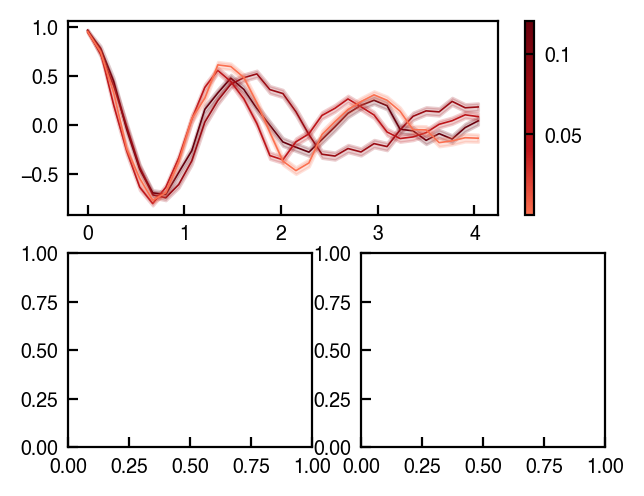

In [18]:
fig

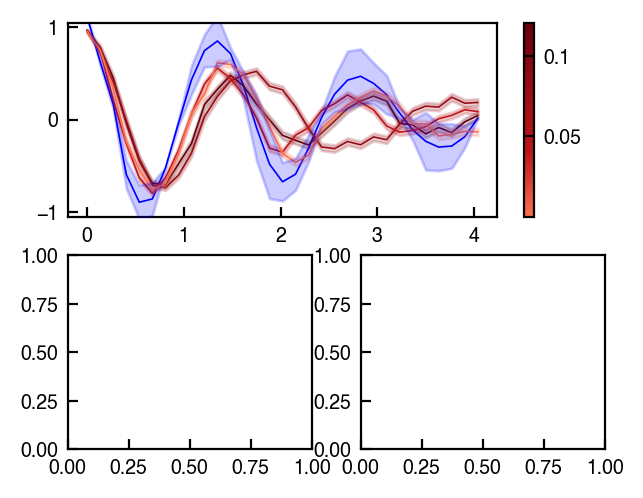

In [19]:

ax_a.fill_between(times, ZNE_data_smooth_ps-ZNE_data_ps_errors, ZNE_data_smooth_ps+ZNE_data_ps_errors, color='blue', alpha=0.2, zorder=1000)
ax_a.plot(times, ZNE_data_smooth_ps, color="blue", label="Zero Noise Extrapolation", zorder=-1, lw=0.6)#, linestyle="--")
ax_a.set_ylim(-1.05, 1.05)

fig

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

index_to_plot = 12
#index_to_plot = 245
#ax_a.vlines(times[index_to_plot],-10, 10, linestyle=":")
#Converting this to an inset:
#ax_a.set_ylim(current_ylims)


for theta_index in theta_sub_index:
    #ax_bi.scatter(thetas[theta_index], stagmag_averaged[theta_index, index_to_plot], color=colors[theta_index], s=10)
    #WARNING THIS IS HARDCODED
    print(colors[theta_index])
    ax_bi.errorbar(theta_list[theta_index], to_use[index_to_plot, theta_index], yerr=flopping_std_matrix[index_to_plot,theta_index]/np.sqrt(500), color=colors[theta_index], elinewidth=1, capsize=2, capthick=1,markersize = 2, fmt='o', zorder=100-theta_index)
#ax_bi.scatter(thetas[theta_index], stagmag_averaged[theta_index, index_to_plot], color=colors[theta_index], label=r"Experimental Points", s=10, zorder=100)
ax_bi.errorbar(theta_list[theta_index], to_use[index_to_plot, theta_index], yerr=flopping_std_matrix[index_to_plot,theta_index]/np.sqrt(500), color=colors[theta_index], label=r"Experimental Points", zorder=100, markersize = 2, fmt='o', elinewidth=1, capsize=2, capthick=1)
ax_a.vlines(times[index_to_plot],-10, 10, linestyle=":")

#Plot ideal:
ax_a.plot(times, np.cos(J*2*times), label = 'Ideal', color = 'r', linestyle = '--')


#Generating the ZNE data and errors for the ax_bi/inset
ZNE_function = lambda x, y, weights: converge_ZNE_loocv(x, y, debug=False, y_error=weights, return_cov=True, remove_first=True)
#ZNE_function =lambda x, y, weights: (order_poly_ZNE(x, y, debug=True, weights=weights, remove_first=True, order=3),0)
ZNE_function_output, std = ZNE_function(theta_list[theta_sub_index_mask], to_use[index_to_plot, theta_sub_index_mask], flopping_std_matrix[index_to_plot,theta_sub_index_mask]/np.sqrt(500))
ZNE_data_plotting = ZNE_function_output(0)
ax_bi.set_xlim([0-(max(theta_list[theta_sub_index_mask])/10), max(theta_list[theta_sub_index_mask])*1.1])   
ax_bi.plot(dense_theta, ZNE_function_output(dense_theta), color="blue",label='Extrapolating Polynomial', zorder=-1)#, linestyle="--")
ax_bi.errorbar(0, ZNE_data_plotting, yerr=std, color="blue", elinewidth=1, capsize=2, capthick=1, fmt='o', markersize=2)
#ax_bi.set_ylim([0, 1])

#Plotting the dense black points from the simulation data. See plots above -- simulation =/= experimental at the moment
ax_bi.fill_between(dense_theta, dense_theta_oscillations_array[:,index_to_plot]/intercept-1/np.sqrt(500), dense_theta_oscillations_array[:,index_to_plot]/intercept+1/np.sqrt(500), color='k', alpha=0.1, zorder=1000, label='Numerical Error')
ax_bi.scatter(dense_theta, dense_theta_oscillations_array[:,index_to_plot]/intercept, s=0.5, color='k')



#ax_bi.scatter(thetas, stagmag_averaged[:, index_to_plot], s=0.5)#, label='Numerical Points')

# subplot_2_ylims = ax_bi.get_ylim()
# ZNE_function = lambda x, y: converge_ZNE_loocv(x, y, debug=False, return_cov=True, remove_first=False, y_error=error_stats)
# print(thetas[indexes_mask])
# print(error_stats)
# ZNE_function_output, std = ZNE_function(thetas[indexes_mask], stagmag_averaged[:, index_to_plot][indexes_mask])
# ZNE_data_plotting = ZNE_function_output(0)
# ax_bi.set_xlim([0-(max(thetas[indexes_mask])/10), max(thetas[indexes_mask])*1.1])
# ax_bi.plot(thetas, ZNE_function_output(thetas), color="blue",label='Extrapolating Polynomial', zorder=-1)#, linestyle="--")
# print(std)
# ax_bi.errorbar(0, ZNE_data_plotting, yerr=std, color="blue", elinewidth=1, capsize=2, capthick=1, fmt='o', markersize=2)
# ax_bi.set_ylim([subplot_2_ylims[0], max([ZNE_function_output(0)+0.03, subplot_2_ylims[1], stagmag_averaged[0,index_to_plot]*1.05])])

# ax_bi.hlines(stagmag_averaged[0,index_to_plot], 0, max(thetas[indexes_mask]), linestyle="--", color="black", label="Noiseless")



(0.9848673587081891, 0.43783160322952713, 0.31234140715109576, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)


IndexError: list index out of range

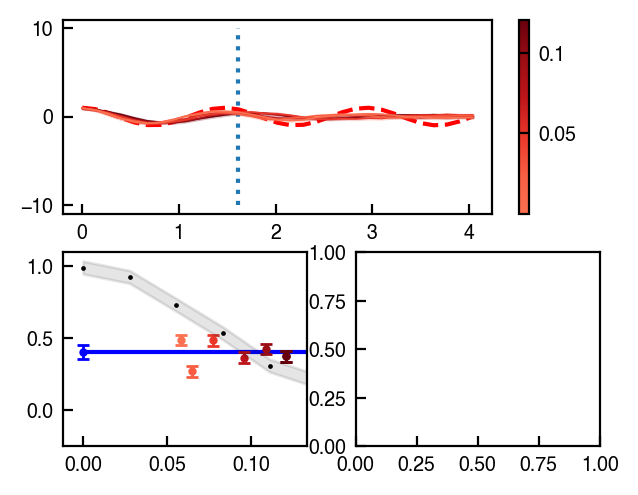

In [ ]:
fig

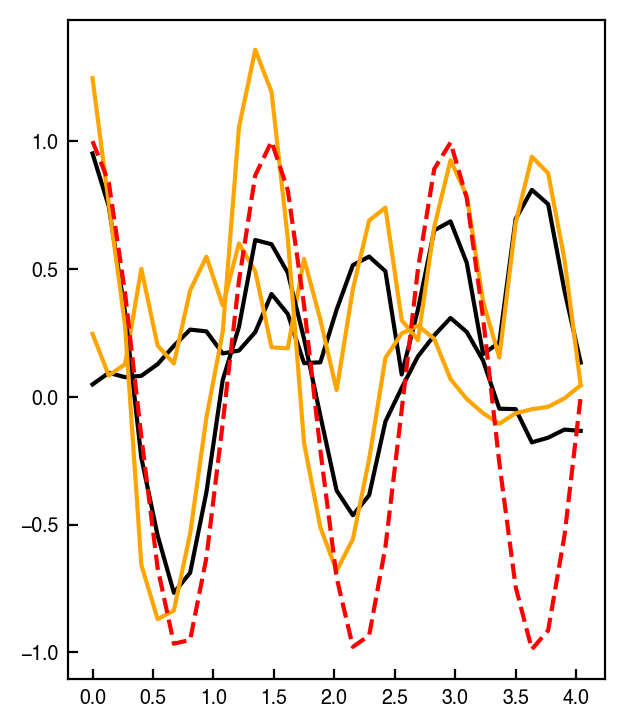

In [ ]:
error_exp = np.abs((to_use[:,0] - np.cos(J*2*times)))#/np.cos(J*2*times))
error_ZNE = np.abs((ZNE_data_smooth - np.cos(J*2*times)))#/np.cos(J*2*times))
error_PS_ZNE = np.abs((ZNE_data_smooth_ps - np.cos(J*2*times)))#/np.cos(J*2*times))
plt.plot(times, error_exp, label='Experimental', color='k')
#plt.plot(times, error_ZNE, label='ZNE', color='b')
plt.plot(times, error_PS_ZNE, label='ZNE + PS', color='orange')
#plt.vlines(times[peak_indices], 1e-3, 1, colors='k')
plt.plot(times, to_use[:,0], label='Experimental', color='k')
#plt.plot(times, ZNE_data_smooth, label='ZNE', color='b')
plt.plot(times, ZNE_data_smooth_ps, label='ZNE + PS', color='orange')
plt.plot(times, np.cos(J*2*times), label='Ideal', color='r', linestyle='--')

#Plotting realtive errors:
relative_error_experimental = np.abs((to_use[:,0] - np.cos(J*2*times))/np.cos(J*2*times))
relative_error_ZNE = np.abs((ZNE_data_smooth - np.cos(J*2*times))/np.cos(J*2*times))
relative_error_PS_ZNE = np.abs((ZNE_data_smooth_ps - np.cos(J*2*times))/np.cos(J*2*times))

cumulative_relative = np.cumsum(relative_error_experimental)
cumulative_relative_ZNE = np.cumsum(relative_error_ZNE)
cumulative_relative_PS_ZNE = np.cumsum(relative_error_PS_ZNE)

cumulative_exp = np.cumsum(error_exp)
cumulative_ZNE = np.cumsum(error_ZNE)
cumulative_PS_ZNE = np.cumsum(error_PS_ZNE)




ax_bii.scatter(times, cumulative_exp, label='Experimental', color='k', s=0.5)
#ax_bii.scatter(times, relative_error_ZNE, label='ZNE', color='b', s=0.5)
ax_bii.scatter(times, cumulative_PS_ZNE, label='ZNE + PS', color='b', s=0.5)

#ax_bii.set_yscale('log')
peak_indices = np.where(np.diff(np.sign(np.diff(np.abs(to_use[:,0])))) == -2)[0]
#ax_bii.vlines(times[peak_indices], 1e-3, 1, colors='k')
#ax_bii.legend()

In [ ]:
ax_a.set_xlabel(r'Time ($\mathrm{ms}$)', usetex=True)
ax_a.set_ylabel(r'$\langle \sigma^z_0 - \sigma^z_1 \rangle$', usetex=True)
ax_a.legend()
ax_bi.set_xlabel(r'Temperature ($\theta$)', usetex=True)
cbar.set_label(r'$\theta$', usetex=True)
ax_bi.set_ylabel(r'$\langle \sigma^z_0 - \sigma^z_1 \rangle$', usetex=True)
ax_bii.set_xlabel(r'Time ($\mathrm{ms}$)', usetex=True)
ax_bii.set_ylabel('Cumulative Error')


fig.tight_layout(pad=0.1, h_pad=0.2, w_pad=0.2)


x, y = -.1, -3.5  # Position in data coordinates
#ax_z = ax_a.inset_axes([-2.7, -3.38, 30.5, 1.97],
#                  xlim  = (32, 34), ylim= (-0.05, .2))
ax_z = inset_axes(ax_a, 
                  width="100%",  # Reduce width to make inset smaller
                  height="100%", # Reduce height to match
                  bbox_to_anchor=(x, y, 1.5, 2.05),
                  bbox_transform=ax_a.transData,  # Use data coordinates
                  loc='center')
x_inset_range = (0.9, 1.1)
y_inset_range = (0, 1)
ax_z.set_xlim(x_inset_range)
ax_z.set_ylim(y_inset_range)
inset_zoom = ax_a.indicate_inset_zoom(ax_z, edgecolor="k", )
connector_lines = inset_zoom[1]  # The connector lines are returned as a tuple
connector_lines[0].set_visible(False)  # Hide the lower-left connector line
connector_lines[1].set_visible(True)   # Show the upper-left connector line
connector_lines[2].set_visible(False)   # Show the lower-right connector line
#Set the z order and transparaency of the connector line
connector_lines[2].set_zorder(-1)
connector_lines[3].set_visible(True)  # Hide the upper-right connector line
#Turn off all all the axes for ax_z:
ax_z.axis('off')
#Turn EVERYTHING OFF, leave only the connectors:
ax_z.set_xticks([])
ax_z.set_yticks([])
ax_z.set_xticklabels([])
ax_z.set_yticklabels([])
ax_z.set_xlabel("")
ax_z.set_ylabel("")

ax_bii.legend(ncol=2)


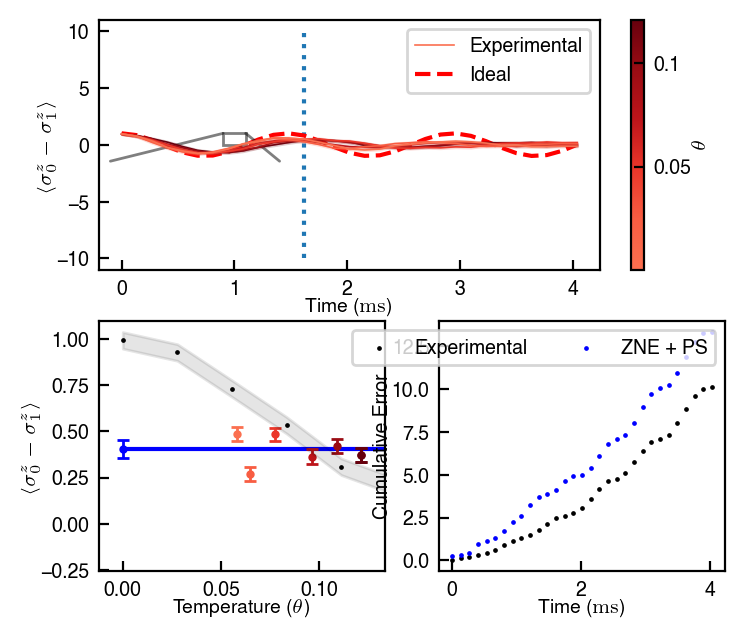

In [ ]:
fig

In [ ]:
#fig.savefig('Figure_4.pdf')#, bbox_inches='tight')
#fig.savefig('Figure_4.png', dpi=600)#, bbox_inches='tight')
#fig.savefig('Figure_4.svg')#, bbox_inches='tight')